In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit

matplotlib.rcParams.update({'font.size': 14})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Figure 1: k-space center as a function of TE

In [2]:
# Define parameters
x = np.linspace(-10, 10, 1001)
te = np.arange(12)*0.9 + 1.13
maxB0 = 15
N = 361 # number of spokes
t2s = 50 #ms

In [3]:
object = x-x[0] 
def phase_dynamicb0(te):
    return np.exp(1j*2*np.pi*maxB0*te*1e-3)
def t2s_model(te, t2s):
    return np.exp(-te/t2s)
def alpha_dynamicb0(te, N):
    return 2*np.pi*maxB0*te/N*1e-3
def phase_dynamicb0_spokewise(te, N):
    return 1 / N * (1-np.exp(1j*alpha_dynamicb0(te,N)*(N+1)))/(1-np.exp(1j*alpha_dynamicb0(te,N)))

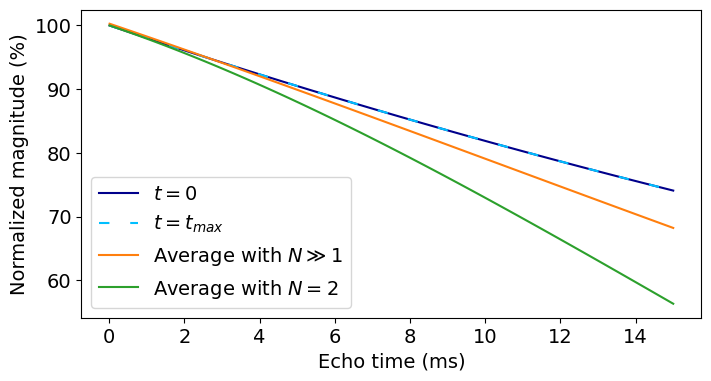

In [4]:
te_series= np.linspace(0.01, 15, 100)
plt.figure(figsize=(8,4))
plt.plot(te_series, 100*t2s_model(te_series, t2s), label=r"$t=0$", alpha=1, color="darkblue")#label=f"T2* = {t2s} ms")
plt.plot(te_series, 100*np.abs(t2s_model(te_series, t2s)*phase_dynamicb0(te_series)), linestyle=(0, (5, 10)), label=r"$t=t_{max}$", color="deepskyblue", alpha=1)#label=f"apparent T2* = {int(np.round(popt[0]))} ms")
# Spoke-wise
plt.plot(te_series , 100*t2s_model(te_series, t2s)*np.abs(phase_dynamicb0_spokewise(te_series, N)), label=r"Average with $N\gg1$", color=colors[1])#label=f"apparent T2* = {int(np.round(popt[0]))} ms")
# Two spokes
plt.plot(te_series, 100*t2s_model(te_series, t2s)*np.abs(0.5*(phase_dynamicb0(te_series)+1)), label=r"Average with $N=2$", color=colors[2])#label=f"apparent T2* = {int(np.round(popt[0]))} ms")
te_plotted = te[[0,5,-1]]
plt.xlabel("Echo time (ms)")
plt.ylabel("Normalized magnitude (%)")
#plt.tight_layout()
plt.legend()

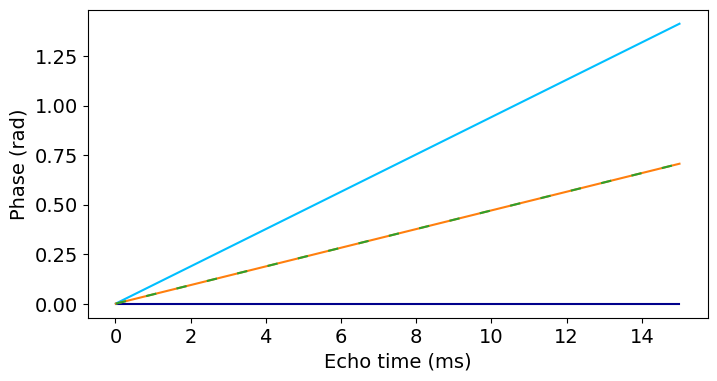

In [5]:
te_series= np.linspace(0.01, 15, 100)
plt.figure(figsize=(8,4))
plt.plot(te_series, np.angle(t2s_model(te_series, t2s)), label=r"1. measurement", color="darkblue")#label=f"T2* = {t2s} ms")
plt.plot(te_series, np.angle(t2s_model(te_series, t2s)*phase_dynamicb0(te_series)), label=r"2. measurement", color="deepskyblue")#label=f"apparent T2* = {int(np.round(popt[0]))} ms")
# Spoke-wise
plt.plot(te_series , np.angle(t2s_model(te_series, t2s)*phase_dynamicb0_spokewise(te_series, N)), label=r"$N\gg1$", color=colors[1])#label=f"apparent T2* = {int(np.round(popt[0]))} ms")
# Two spokes
plt.plot(te_series, np.angle(t2s_model(te_series, t2s)*(0.5*(phase_dynamicb0(te_series)+1))), linestyle=(0, (5, 10)), label=r"$N=2$", color=colors[2])#label=f"apparent T2* = {int(np.round(popt[0]))} ms")
te_plotted = te[[0,5,-1]]
plt.xlabel("Echo time (ms)")
plt.ylabel("Phase (rad)")
# plt.tight_layout()
# plt.legend()
plt.show()